#### Crypto currencies market analysis (Part B)

- Author: Jane (Desislava) Nikolova
- Date: August, 2023

Contents:

Contents:
- **EDA - Exploratory data analysis**

- **Data preprocessing and features reduction (if applicable)**

- Predictions' Models:

- **Linear Regression (Part A)**
    
- **Support vector machines (regression) (Part B)**

- **Stochastic Gradient Descent (regression) (Part B)**

- **Gradient Boosting (regression) (Part B)**

- **Neural Networks (regression) (Part B)**
    

##### I. EDA - Exploratory data analysis & Data preprocessing and features reduction (if applicable)

The following 12 crypto currencies are present in the selected dataset: 

- tezos
- binance-coin
- eos
- bitcoin 
- tether
- xrp
- bitcoin-cash
- stellar
- litecoin
- ethereum
- cardano
- bitcoin-sv

The dataset has 28,944 records. For some algorithms and visualizations, this means that a random sample must be drawn to complete all calculations. There are no missing and no duplicated values in the dataset which means that the dataset is of good quality.

Code:

In [47]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing or loading the dataset
dataset = pd.read_csv('consolidated_coin_data.csv')

#Uncomment to see console output:
####print(((dataset['Volume']).describe()))
####print(((dataset['Open']).describe()))
####print(((dataset['High']).describe()))
####print(((dataset['Low']).describe()))
####print(((dataset['Close']).describe()))

#def stripCommas(x):
    #return x.rstrip(",") 
#dataset['Volume']= dataset['Volume'].apply(stripCommas) 

#Convert to numerical values
dataset['Volume']=dataset['Volume'].str.replace(',','')
dataset['Volume']=dataset['Volume'].astype(float)
dataset['Open']=dataset['Open'].str.replace(',','')
dataset['Open']=dataset['Open'].astype(float)
dataset['High']=dataset['High'].str.replace(',','')
dataset['High']=dataset['High'].astype(float)
dataset['Low']=dataset['Low'].str.replace(',','')
dataset['Low']=dataset['Low'].astype(float)
dataset['Close']=dataset['Close'].str.replace(',','')
dataset['Close']=dataset['Close'].astype(float)

In [64]:
#Uncomment to see console output:
####print(dataset.head(3))

In [66]:
#Uncomment to see console output:
####print(dataset.columns)

In [67]:
#Uncomment to see output:
####print(dataset['Currency'].unique())

In [68]:
#Uncomment to see console output:
####print(dataset.shape)
####print(dataset.isna().sum())
####print(dataset.duplicated().any())

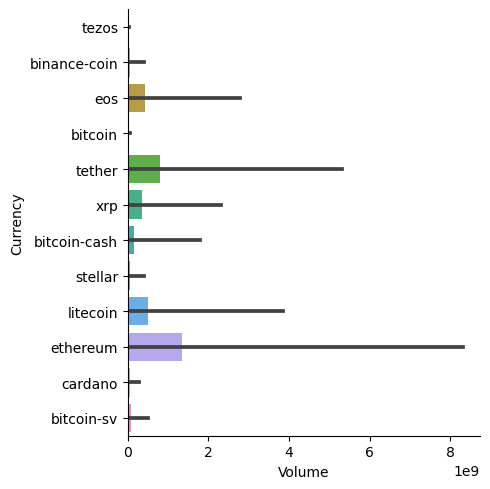

In [48]:
import pandas as pd
import numpy as np
from scipy import stats

# Remove the outliers
dataset = dataset[(np.abs(stats.zscore(dataset["Volume"])) < 3)]
dataset = dataset[(np.abs(stats.zscore(dataset["High"])) < 3)]
dataset = dataset[(np.abs(stats.zscore(dataset["Low"])) < 3)]
dataset = dataset[(np.abs(stats.zscore(dataset["Close"])) < 3)]
dataset = dataset[(np.abs(stats.zscore(dataset["Open"])) < 3)]
sns.catplot(data=dataset, 
            x="Volume", 
            y="Currency", errorbar=("pi", 95), kind="bar")

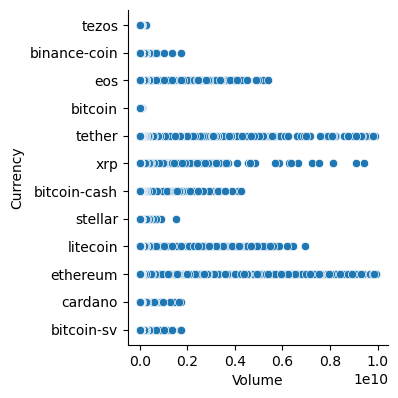

In [49]:
sns.pairplot(dataset, x_vars='Volume', 
             y_vars='Currency', 
             height=4, 
             aspect=1, 
             kind='scatter')
plt.show()

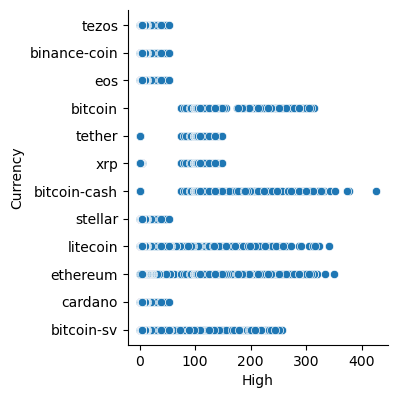

In [50]:
sns.pairplot(dataset, x_vars='High', 
             y_vars='Currency', 
             height=4, 
             aspect=1, 
             kind='scatter')
plt.show()

In [51]:
currencies = dataset['Currency'].unique()
for c in currencies:
    d = dataset[dataset['Currency']==c]
    #Uncomment to see console output:
    ####print(c)
    ####print((d['Volume']).max())
    #print(d['Volume'].describe)

##### II. Predictions & Model Validation
 **Support Vector Machines - Predicting market High price based on the provided data**

Steps:

- Encode the categorical variable 'Currency'
- Standardize/Scale the numerical variables to make them comparable.
- Split the data into model training and model testing (validation) sets using random sampling and 20% size of the testing (validation) set.
- Generate a SVM model with the training X and Y sets
- Fit the model
- **Estimate the model accuracy** using the testing (validation) set and the fitted data (predictions made with the generated model). Calculate:
    - Percent variance explained: R2
    - Mean Absolute Error: MAE
    - Mean Square Error: MSE
    - Root Mean Square Error: RMSE
    
The **SVM model is highly inaccurate** compared to the Linear Regression model from Part A:

    - Percent variance explained: -4% (unacceptable)
    - Mean Absolute Error: 21.60 (unacceptable)
    - Mean Square Error: 3275.40 (unacceptable)
    - Root Mean Square Error: 57.23 (unacceptable)
    
The plot below shows that the high deviation of the predicted from the real values.

In [52]:
#Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
unencoded_currency = dataset['Currency']
dataset['Currency'] = encoder.fit_transform(dataset['Currency'])

# Selecting dependent (Y) and independent (X) variables 
X = dataset[['Currency', 'Open', 'Close', 'Low','Volume']]
y = dataset['High']

#Pre-processing: Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#X = sc.fit_transform(X)
#y = sc.transform(y)

#Partitioning into Training set and Testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#SVM model:
from sklearn import svm
regrSVR = svm.SVR()
regrSVR.fit(x_train, y_train)

SVR()

In [54]:
# Estimating model accuracy using the validation set:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Finding the % variance explained by the model:
R2 = format(regrSVR.score(X,y)*100) 

# Making predictions on train and test data:
y_pred_mlr= regrSVR.predict(x_test)  
v_pred_mlr= regrSVR.predict(x_train)  

# New dataframe with Actual value and the predicted values:
mlr_diff = pd.DataFrame({'Actual value': y_test, 
                         'Predicted value': y_pred_mlr})

# Estimating Model accuracy:
meanAbErr = metrics.mean_absolute_error(y_test, 
                                        y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, 
                                       y_pred_mlr)
rootMeanSqErr = metrics.mean_squared_error(y_test, 
                                           y_pred_mlr, 
                                           squared=False)
#Uncomment to see console output:
print('Percent variance explained:', R2)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Percent variance explained: -4.043012013939817
Mean Absolute Error: 21.598722845283106
Mean Square Error: 3275.39659469838
Root Mean Square Error: 57.231080670369835


<Axes: >

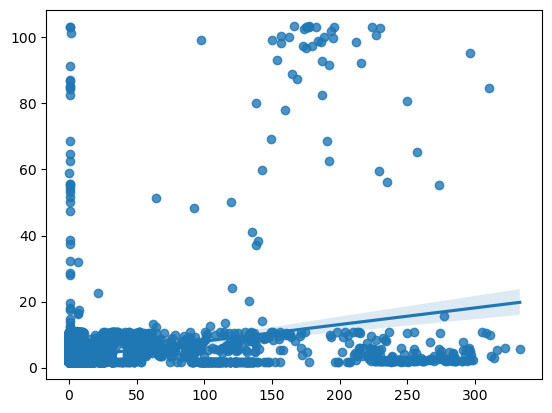

In [55]:
x1 = list(mlr_diff["Actual value"])
y1 = list(mlr_diff["Predicted value"])
sns.regplot(x=x1, 
            y=y1)

**SGDRegressor**

Linear model fitted by minimizing a regularized empirical loss with SGD.

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

**The resulting model is acceptable** and the RMSE is lower than the Linear Regression model from Part A:

    - Mean Absolute Error: 0.39
    - Mean Square Error: 1.7
    - Root Mean Square Error: 1.29
    

In [56]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#n_samples, n_features = 10, 5
#rng = np.random.RandomState(0)
#y = rng.randn(n_samples)
#X = rng.randn(n_samples, n_features)

regSGDPipeline = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
regSGDPipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [57]:
# Finding the % variance explained by the model:
R2 = format(regSGDPipeline.score(X,y)*100) 

# Making predictions on train and test data:
y_pred_mlr= regSGDPipeline.predict(x_test)  
v_pred_mlr= regSGDPipeline.predict(x_train)  

# New dataframe with Actual value and the predicted values:
mlr_diff = pd.DataFrame({'Actual value': y_test, 
                         'Predicted value': y_pred_mlr})

# Estimating Model accuracy:
meanAbErr = metrics.mean_absolute_error(y_test, 
                                        y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, 
                                       y_pred_mlr)
rootMeanSqErr = metrics.mean_squared_error(y_test, 
                                           y_pred_mlr, 
                                           squared=False)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.3977489979253634
Mean Square Error: 1.660694676195764
Root Mean Square Error: 1.2886794311215508


<Axes: >

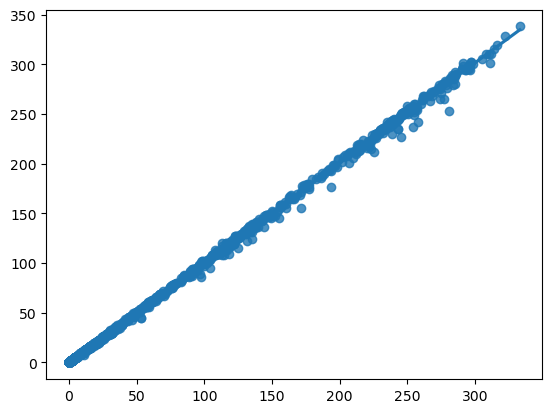

In [58]:
x1 = list(mlr_diff["Actual value"])
y1 = list(mlr_diff["Predicted value"])
sns.regplot(x=x1, 
            y=y1)

**Gradient Boosting Regressor** 

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions, see the seminal work of [Friedman2001]. 

The module sklearn.ensemble provides methods for both classification and regression via gradient boosted decision trees.

The model performance is also very good.

    - Mean Absolute Error: 0.9
    - Mean Square Error: 5.0
    - Root Mean Square Error: 2.2
    

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
     n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
     loss='squared_error')
gbr.fit(x_train,y_train)
gbr

GradientBoostingRegressor(max_depth=1, random_state=0)

In [61]:
# Making predictions on train and test data:
y_pred_mlr= gbr.predict(x_test)  
v_pred_mlr= gbr.predict(x_train)  

# New dataframe with Actual value and the predicted values:
mlr_diff = pd.DataFrame({'Actual value': y_test, 
                         'Predicted value': y_pred_mlr})

# Estimating Model accuracy:
meanAbErr = metrics.mean_absolute_error(y_test, 
                                        y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, 
                                       y_pred_mlr)
rootMeanSqErr = metrics.mean_squared_error(y_test, 
                                           y_pred_mlr, 
                                           squared=False)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.9091779833306568
Mean Square Error: 4.966184066841505
Root Mean Square Error: 2.228493676643823


<Axes: >

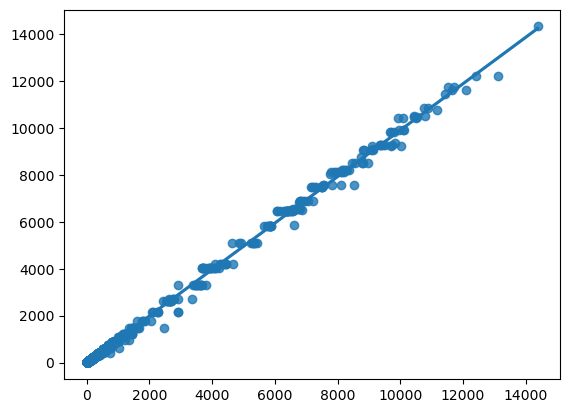

In [32]:
x1 = list(mlr_diff["Actual value"])
y1 = list(mlr_diff["Predicted value"])
sns.regplot(x=x1, 
            y=y1)

**Neural Networks**

Multi-layer Perceptron regressor - This model optimizes the squared error using LBFGS or stochastic gradient descent.

The NN model does not perform well on this data:

    - Mean Absolute Error: 28.31 (not acceptabel)
    - Mean Square Error: 5656.53 (not acceptabel)
    - Root Mean Square Error: 75.21 (not acceptabel)


In [62]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

NNregr = MLPRegressor(random_state=1, max_iter=500)
NNregr.fit(x_train, y_train)
NNregr

MLPRegressor(max_iter=500, random_state=1)

In [63]:
# Making predictions on train and test data:
y_pred_mlr= NNregr.predict(x_test)  
v_pred_mlr= NNregr.predict(x_train)  

# New dataframe with Actual value and the predicted values:
mlr_diff = pd.DataFrame({'Actual value': y_test, 
                         'Predicted value': y_pred_mlr})

# Estimating Model accuracy:
meanAbErr = metrics.mean_absolute_error(y_test, 
                                        y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, 
                                       y_pred_mlr)
rootMeanSqErr = metrics.mean_squared_error(y_test, 
                                           y_pred_mlr, 
                                           squared=False)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 28.311417441458136
Mean Square Error: 5656.532519402147
Root Mean Square Error: 75.20992301154249


<Axes: >

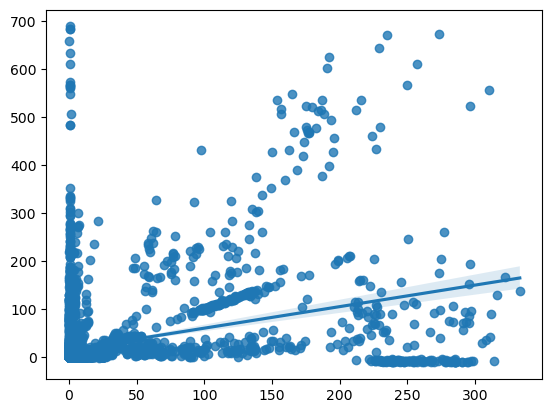

In [64]:
x1 = list(mlr_diff["Actual value"])
y1 = list(mlr_diff["Predicted value"])
sns.regplot(x=x1, 
            y=y1)